In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
import tensorflow as tf
from IPython.display import clear_output
import warnings
from model import create_model, load_weights, save_weights
from preprocess import load_scalers, scale_data, get_all_data, get_datagen
from trading_strategy import strategy
warnings.filterwarnings("ignore")

In [10]:
val_dir = 'btc_data_extended/val_slices'
scalers_dir = 'scalers_new'
weights_dir = 'pretrained/btcusd_trip_2/Epoch_4'
slices = 36
x_len = 120
x_shape, y_shape = (x_len, 177), (3,)

In [3]:
scalers = load_scalers()

In [6]:
model = create_model(x_shape, y_shape, conv_size=128, conv_blocks=2, dense_size=1024)

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 120, 128)          113408    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 120, 128)          82048     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 60, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 60, 256)           164096    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 60, 256)           327936    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 30, 256)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7680)             

In [ ]:
model.load_weights(os.path.join(weights_dir, f's{slices}.h5'))

In [14]:
def get_pred_and_close(model, data, gen):
    prob = np.amax(model.predict(gen), axis=1)
    pred = np.argmax(model.predict(gen), axis=1)
    pred[pred == 2] = -1
    close = data.c.values
    return pred, prob, close

Data generating:  (64, 120, 177) (64, 3)


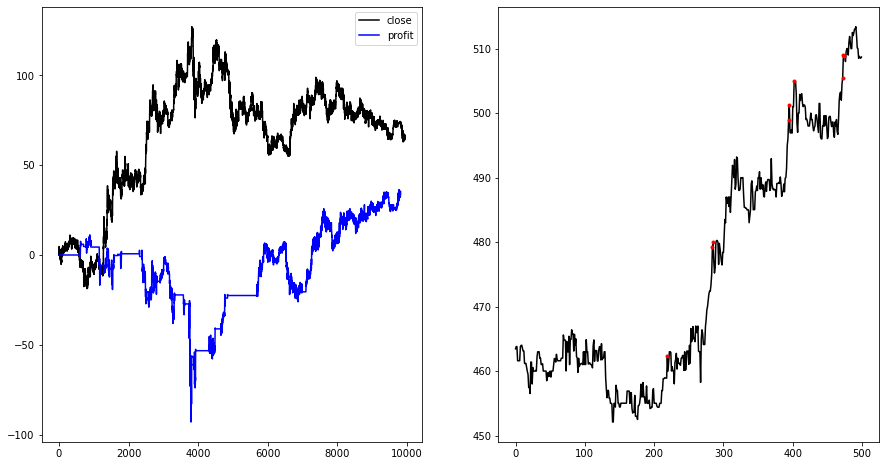

Data generating:  (64, 120, 177) (64, 3)


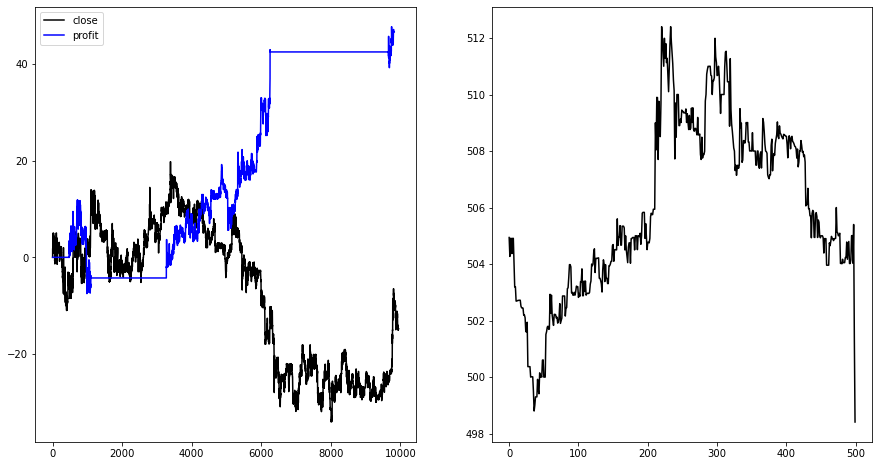

Data generating:  (64, 120, 177) (64, 3)


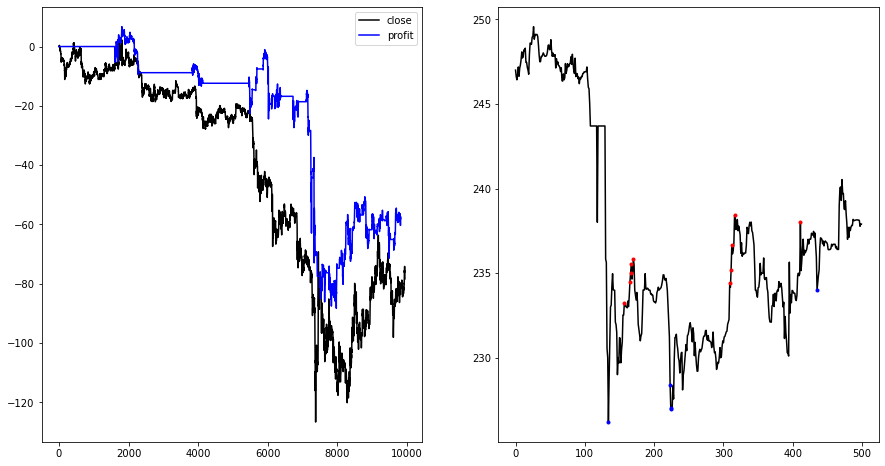

Data generating:  (64, 120, 177) (64, 3)


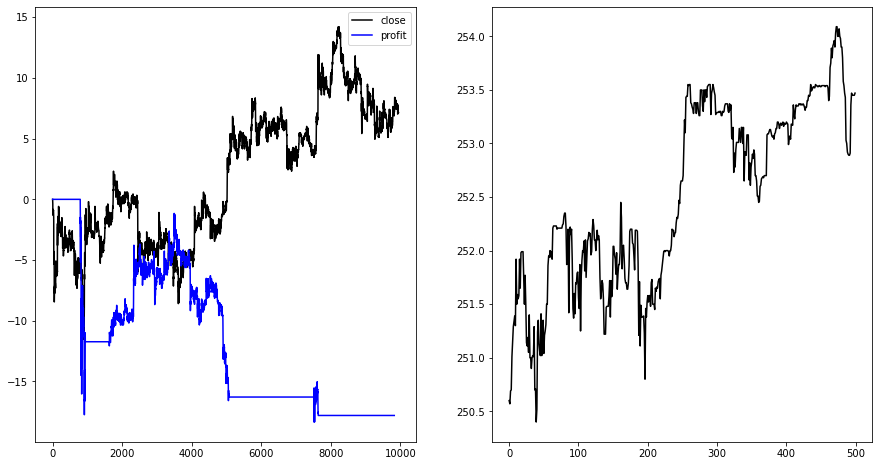

Data generating:  (64, 120, 177) (64, 3)


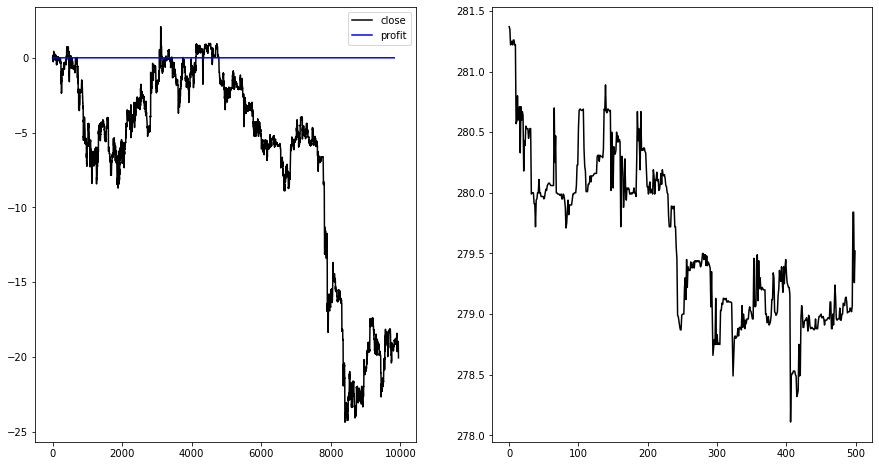

Data generating:  (64, 120, 177) (64, 3)


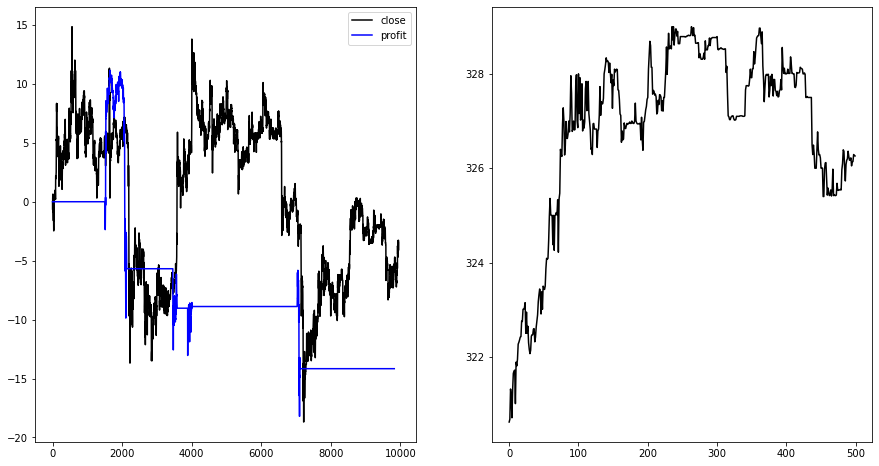

Data generating:  (64, 120, 177) (64, 3)


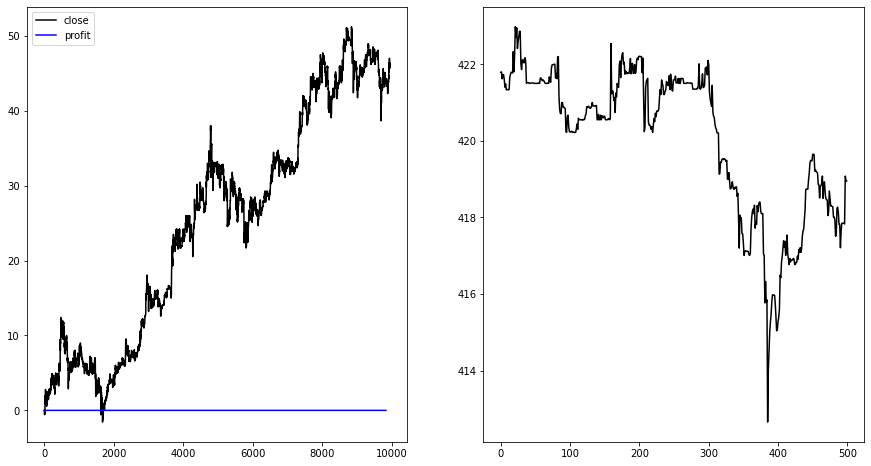

Data generating:  (64, 120, 177) (64, 3)


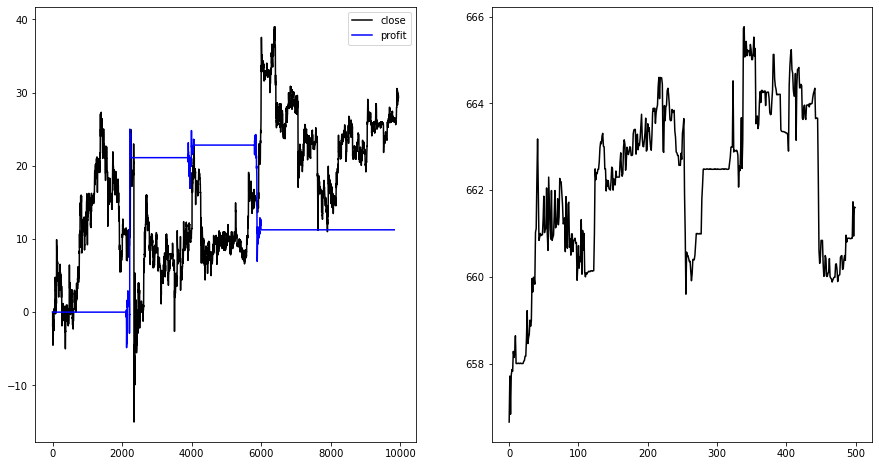

Data generating:  (64, 120, 177) (64, 3)


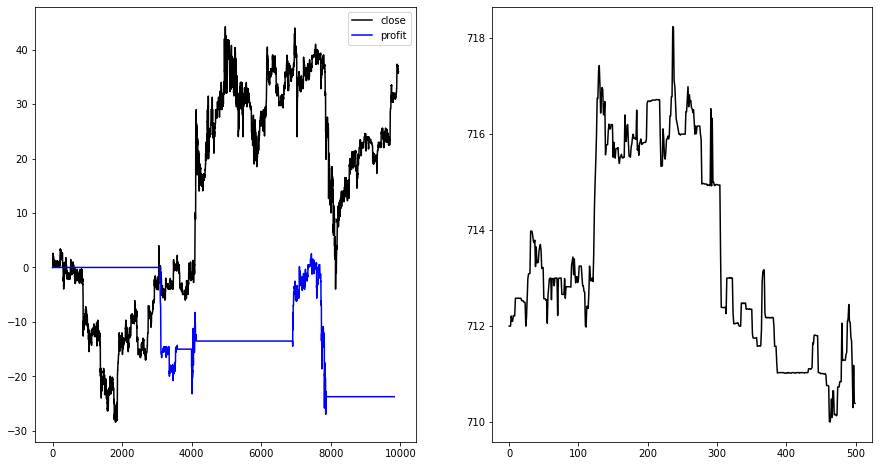

Data generating:  (64, 120, 177) (64, 3)


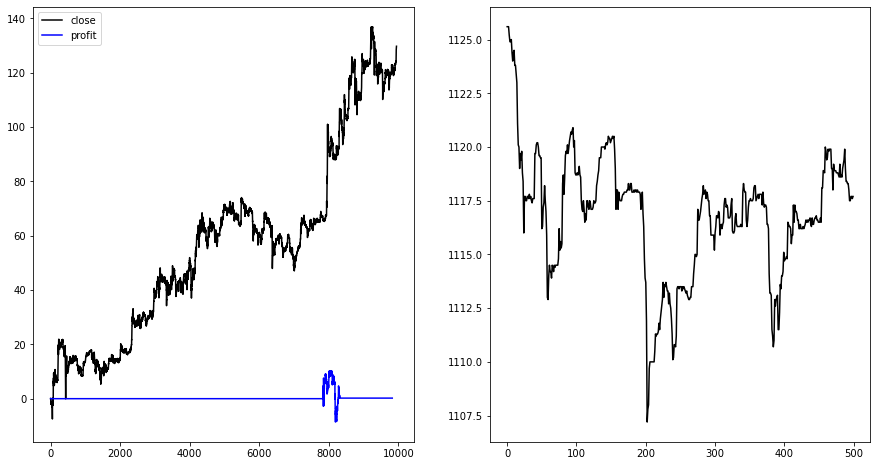

Data generating:  (64, 120, 177) (64, 3)


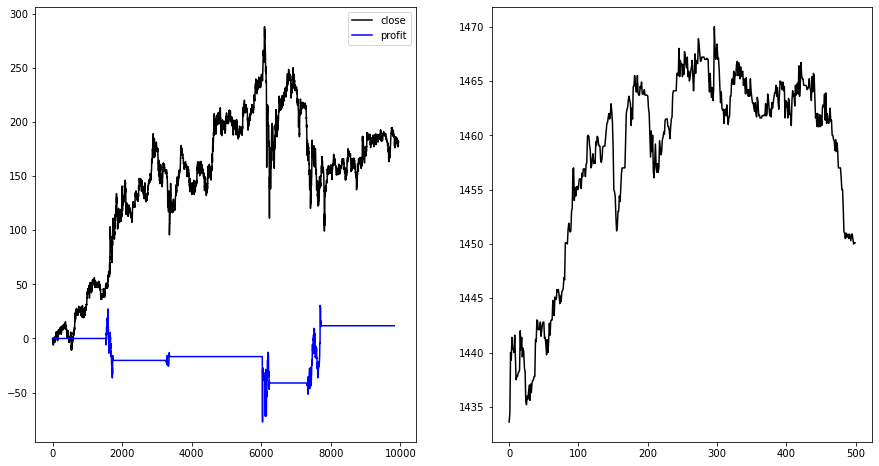

Data generating:  (64, 120, 177) (64, 3)


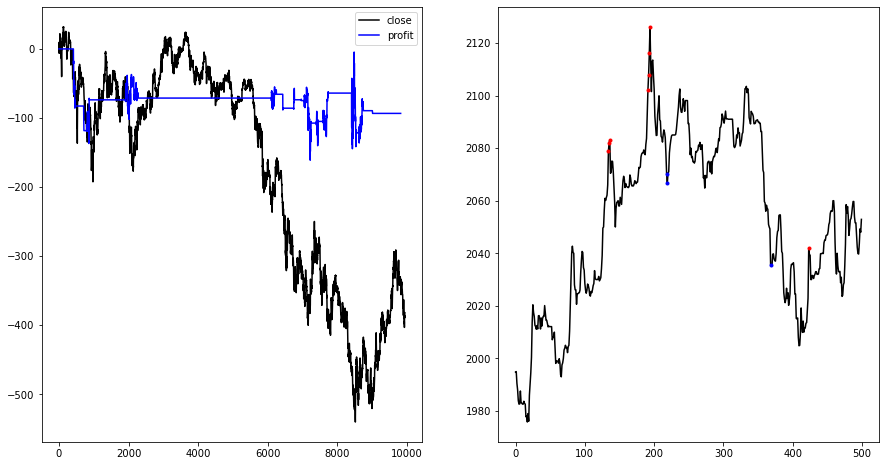

Data generating:  (64, 120, 177) (64, 3)


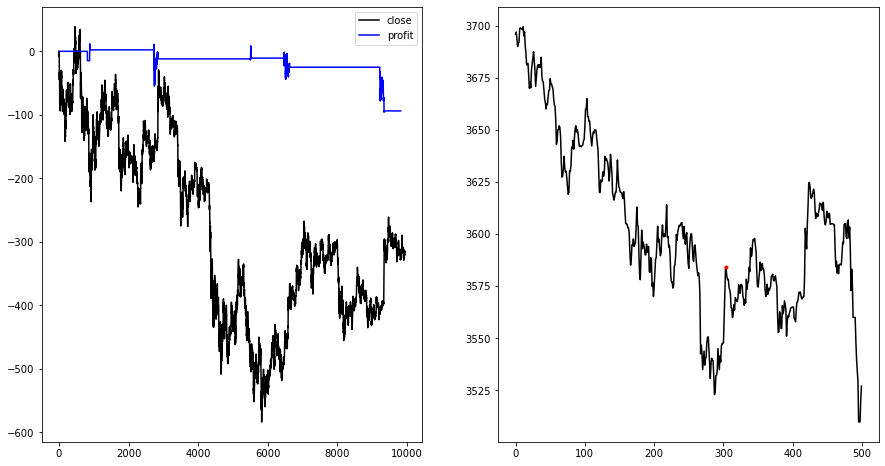

Data generating:  (64, 120, 177) (64, 3)


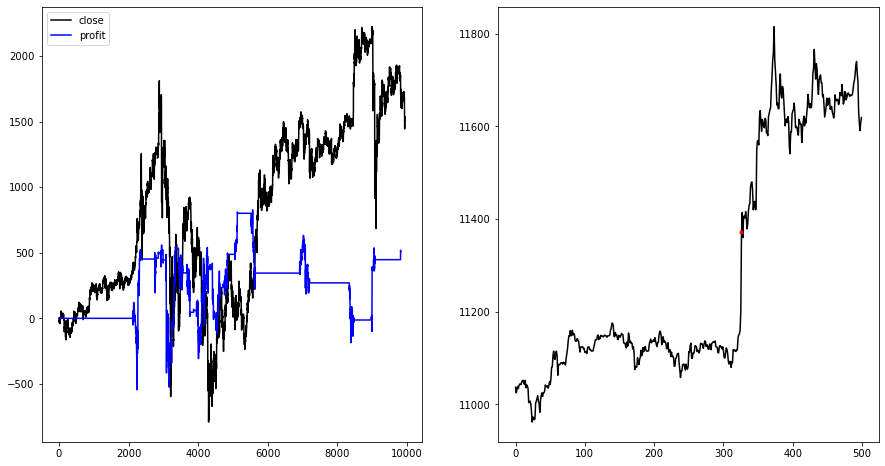

Data generating:  (64, 120, 177) (64, 3)


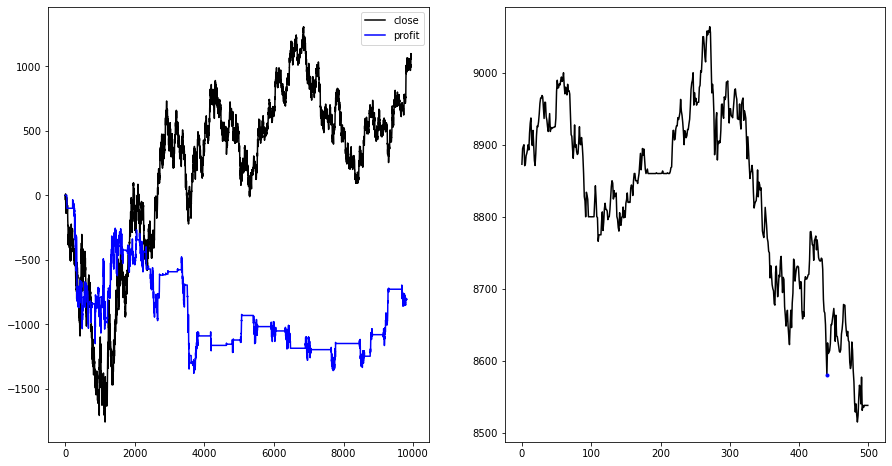

Data generating:  (64, 120, 177) (64, 3)


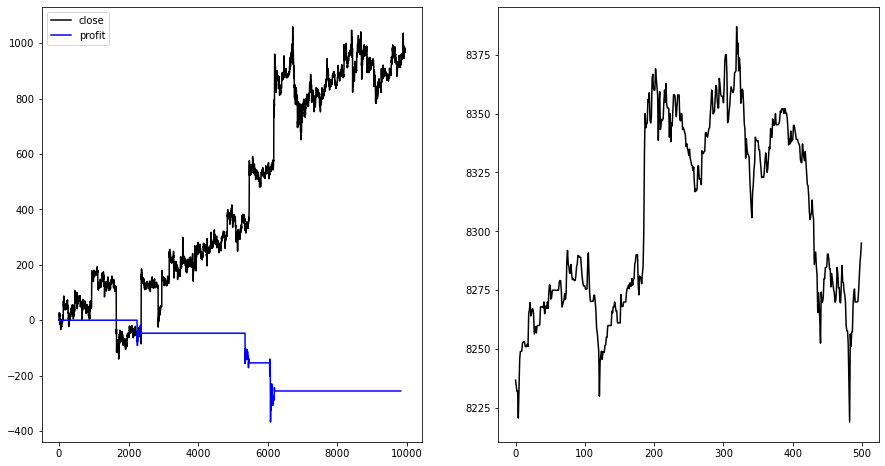

Data generating:  (64, 120, 177) (64, 3)


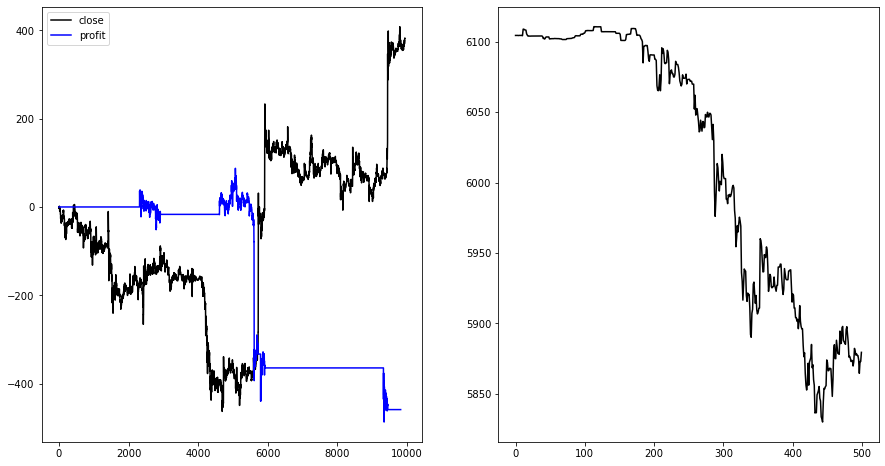

Data generating:  (64, 120, 177) (64, 3)


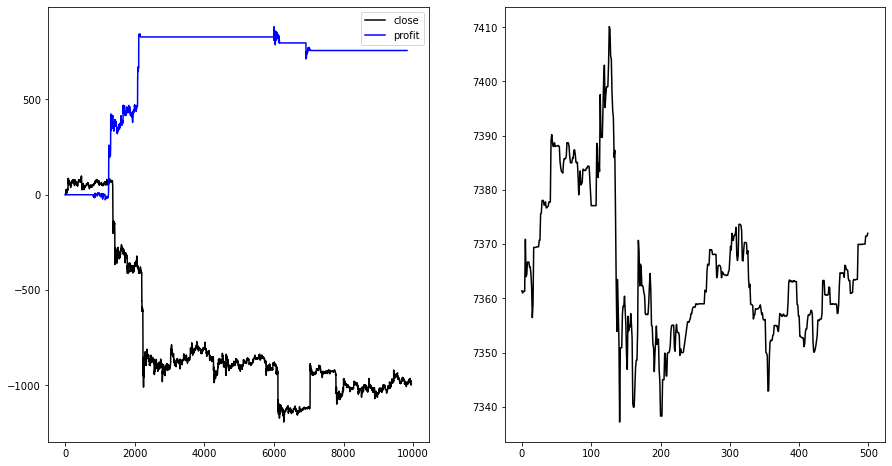

Data generating:  (64, 120, 177) (64, 3)


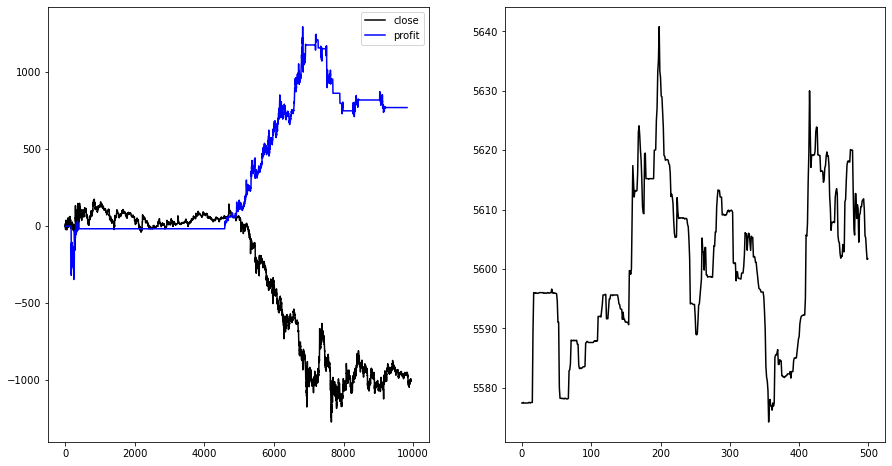

Data generating:  (64, 120, 177) (64, 3)


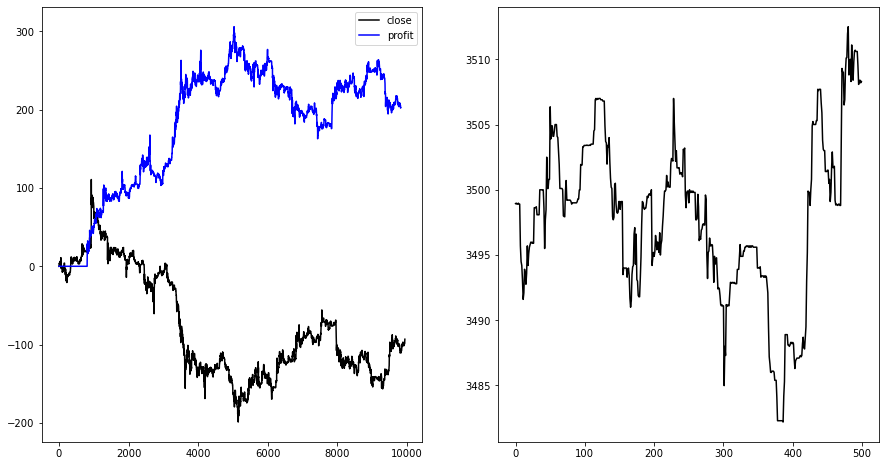

Data generating:  (64, 120, 177) (64, 3)


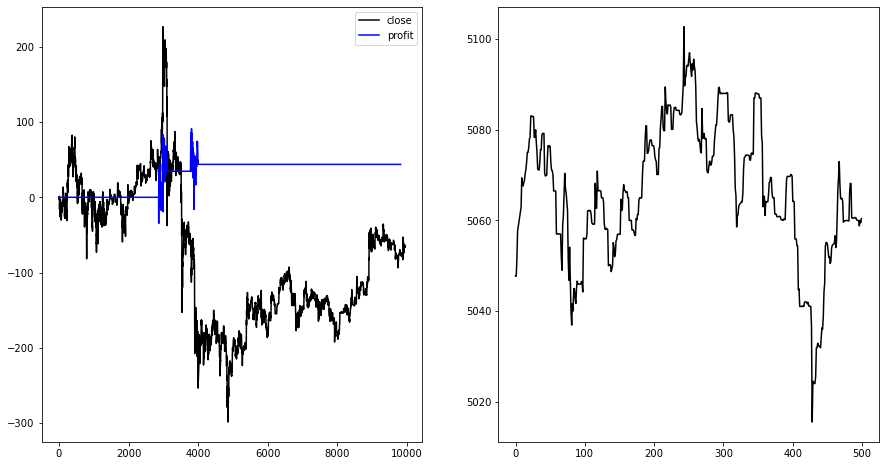

Data generating:  (64, 120, 177) (64, 3)


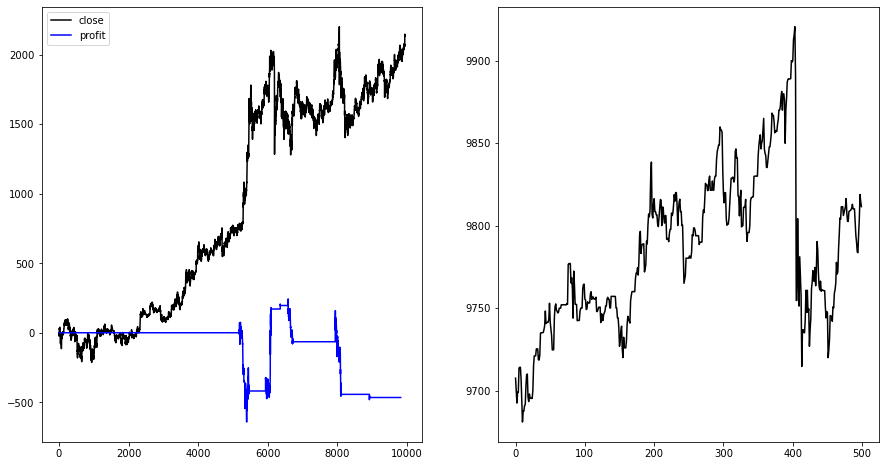

Data generating:  (64, 120, 177) (64, 3)


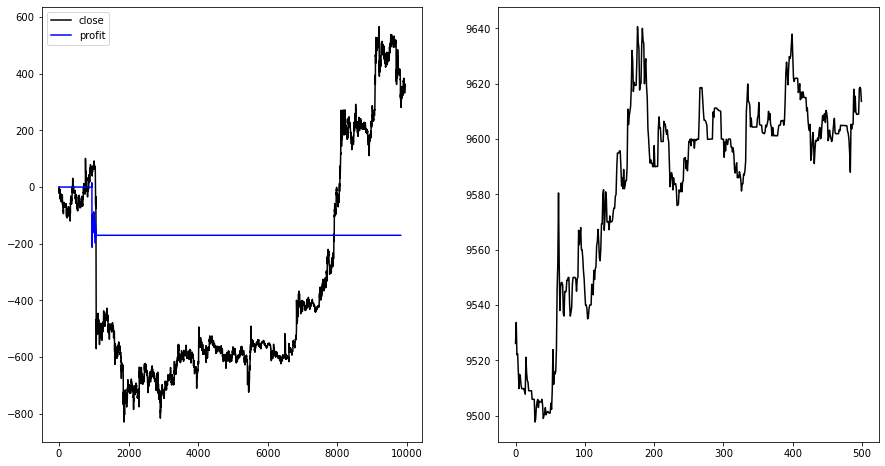

Data generating:  (64, 120, 177) (64, 3)


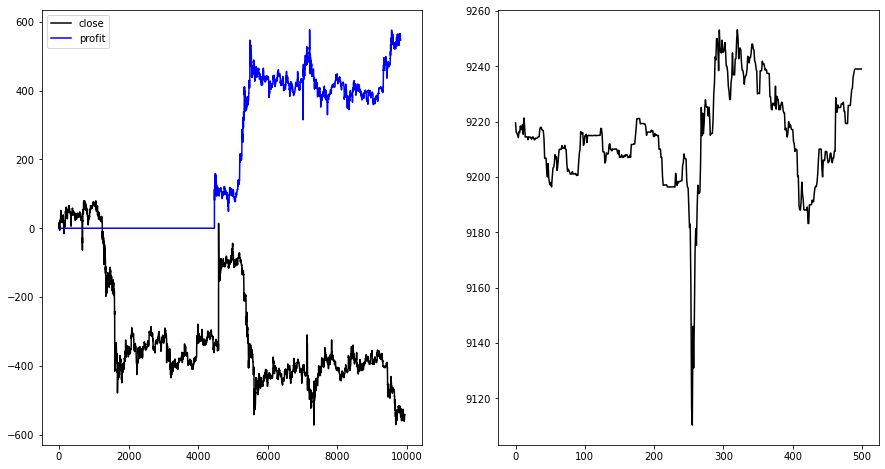

Data generating:  (64, 120, 177) (64, 3)


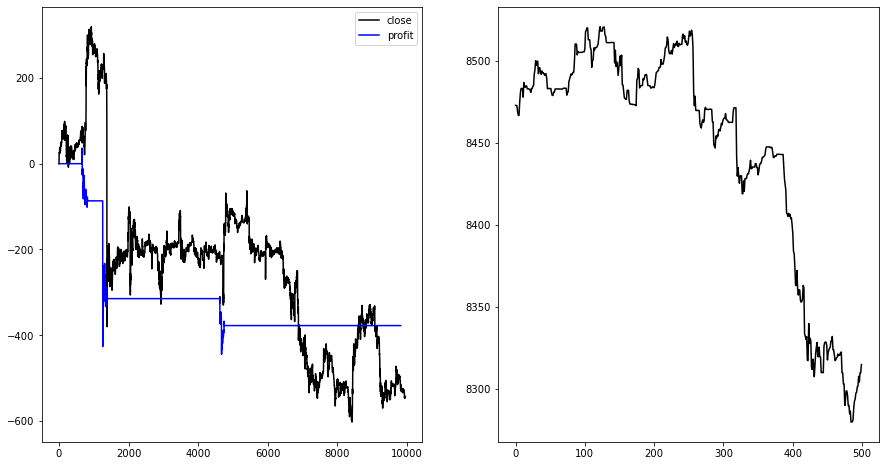

Data generating:  (64, 120, 177) (64, 3)


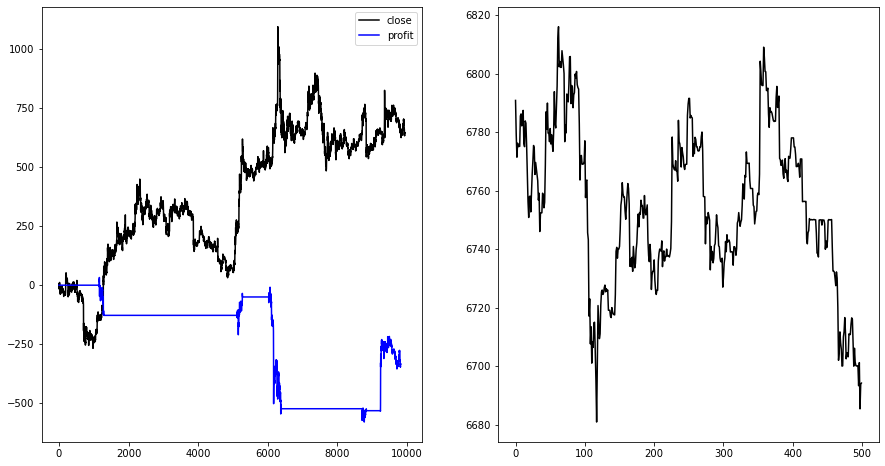

Data generating:  (64, 120, 177) (64, 3)


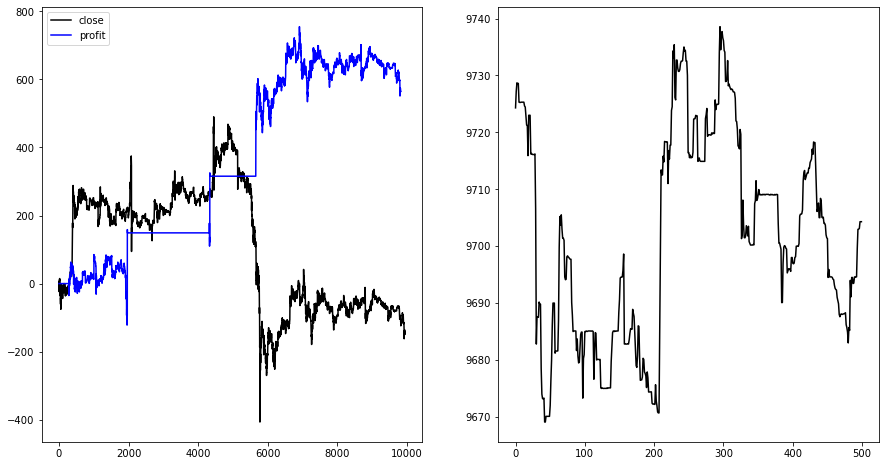

Data generating:  (64, 120, 177) (64, 3)


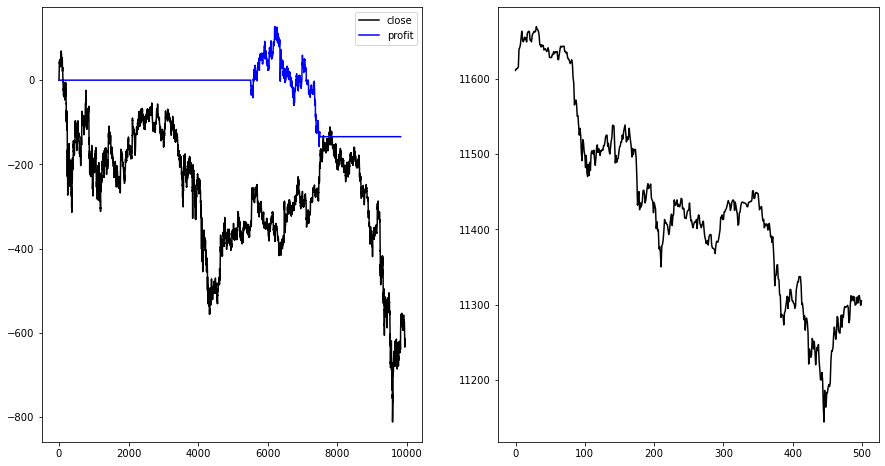

Data generating:  (64, 120, 177) (64, 3)


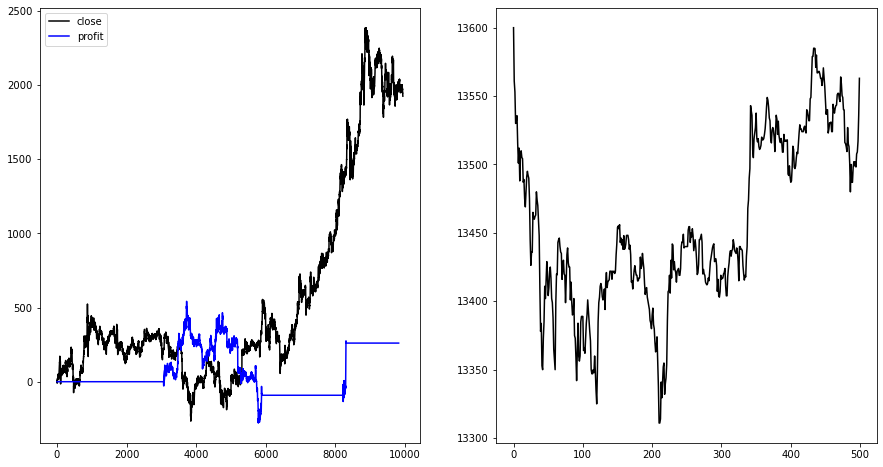

Data generating:  (64, 120, 177) (64, 3)


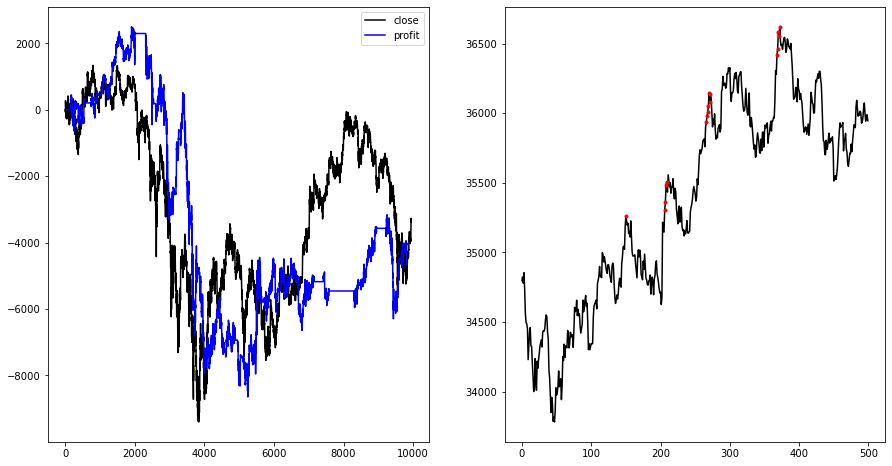

Data generating:  (64, 120, 177) (64, 3)


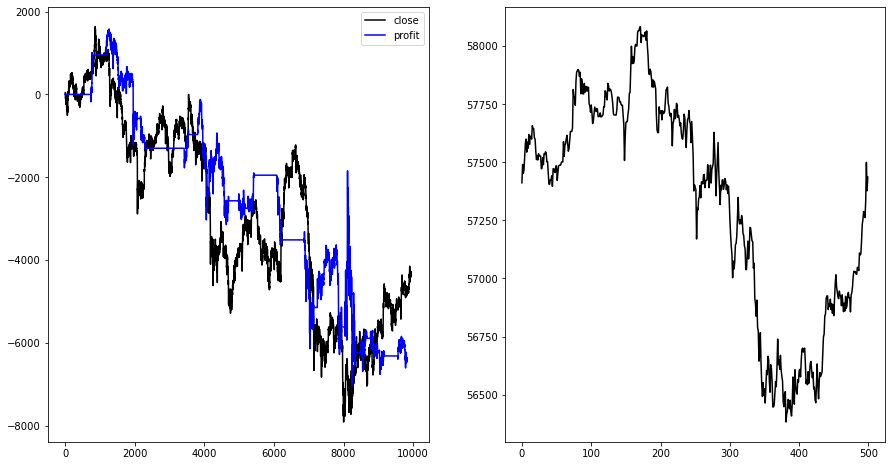

Data generating:  (64, 120, 177) (64, 3)


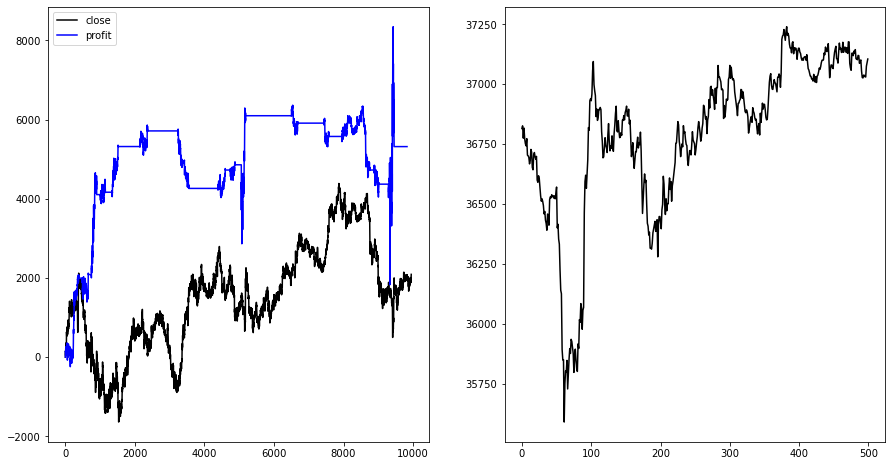

Data generating:  (64, 120, 177) (64, 3)


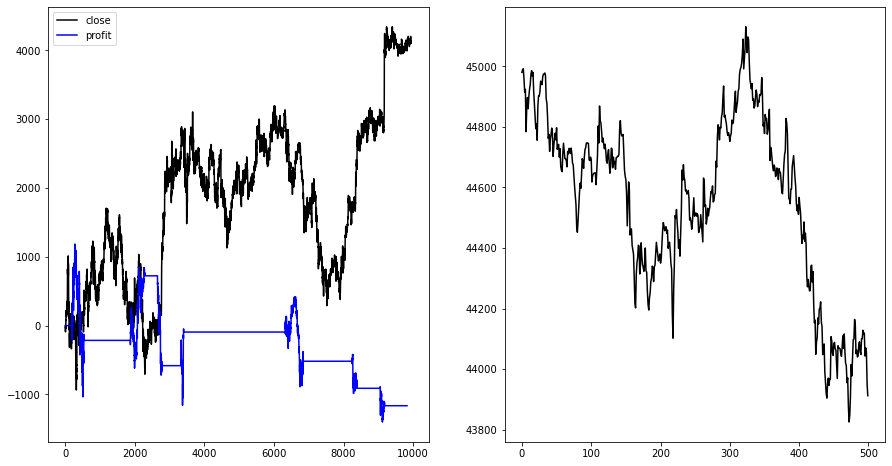

Data generating:  (64, 120, 177) (64, 3)


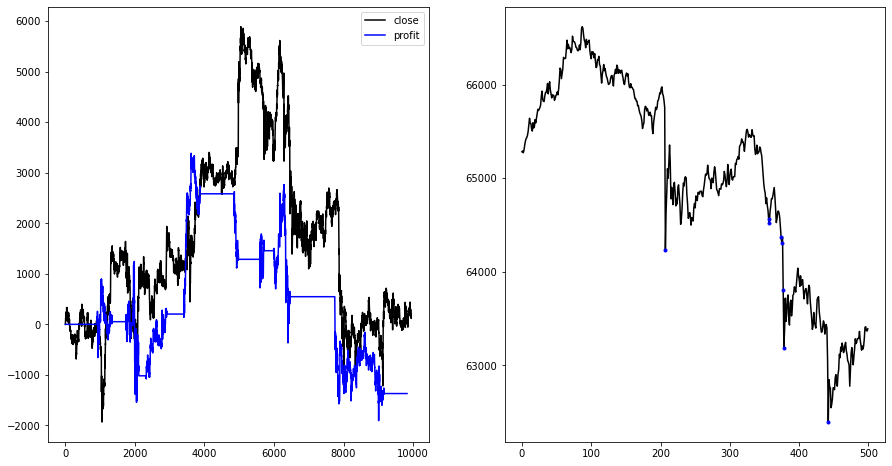

Data generating:  (64, 120, 177) (64, 3)


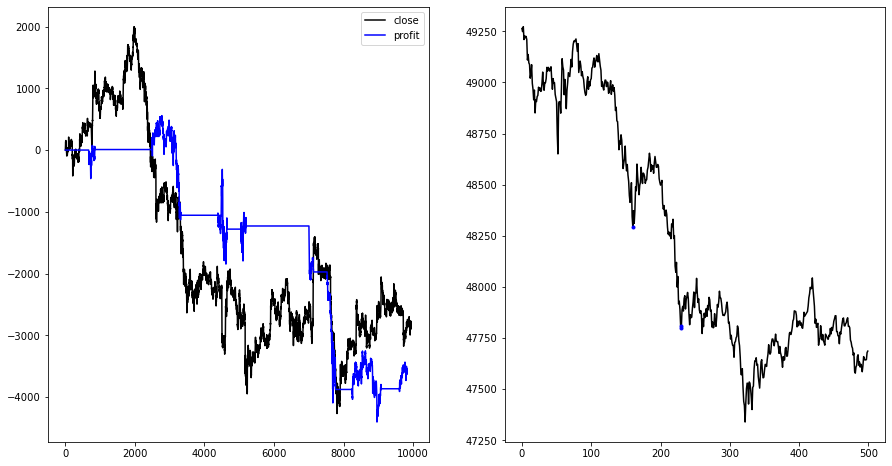

Data generating:  (64, 120, 177) (64, 3)


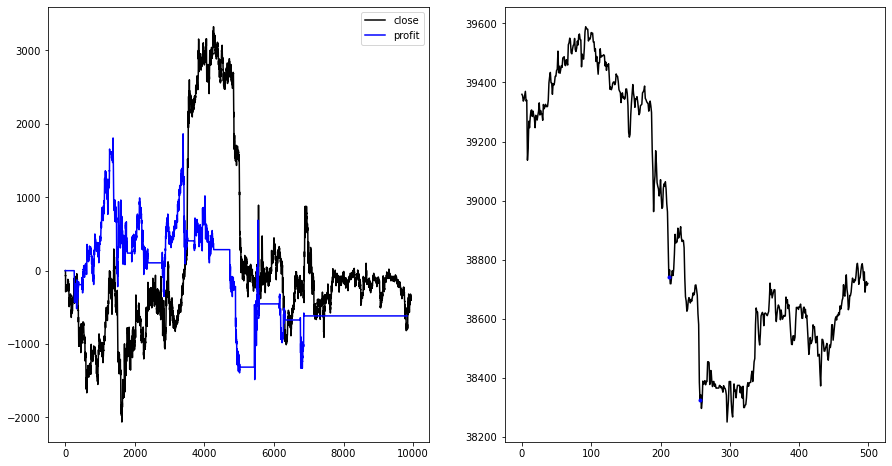

In [17]:
close_array = np.array([0])
profit_list = [0]
for i in range(slices):
    val_data = pd.read_csv(os.path.join(val_dir, f's{i+1}.csv'), index_col=0)
    close = val_data.c.values
    #print(f'val slice {i+1}/{slices} loaded')
    X_val, Y_val = get_all_data(val_data, scalers, target='e_trip', categorical=True)
    #print('val data preprocessed')
    valDataGen = get_datagen(X_val, Y_val, shuffle=False)
    pred, prob, close = get_pred_and_close(model, val_data, valDataGen)
    close_array = np.concatenate([close_array, close - close[0] + close_array[-1]])
    profit = strategy(pred, prob, close, limit=100, lots=1, verbose=0, stop=0.005, take=100, thresh=0.8)
    profit_list += list(np.array(profit) + profit_list[-1])

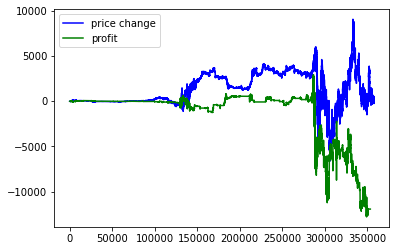

In [18]:
plt.plot(close_array, 'b', label='price change')
plt.plot(profit_list, 'g', label='profit')
plt.legend()
plt.show()